 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [18]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [19]:
# Reading whale returns
whale_returns_csv = Path('../Resources/whale_returns.csv')
# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [20]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [21]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [22]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [23]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [24]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [25]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [26]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [27]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '').astype('float')
sp500_history_df.dtypes

Close    float64
dtype: object

In [28]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [29]:
# Drop nulls
# YOUR CODE HERE
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [30]:
# Rename Column
# YOUR CODE HERE
sp500_daily_returns = sp500_daily_returns.rename(columns={
    'Close': 'S&P 500',
})

sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [31]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
concat_returns_df = pd.concat([whale_returns_df,algo_returns_df,sp500_daily_returns],axis='columns',join='inner')
concat_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

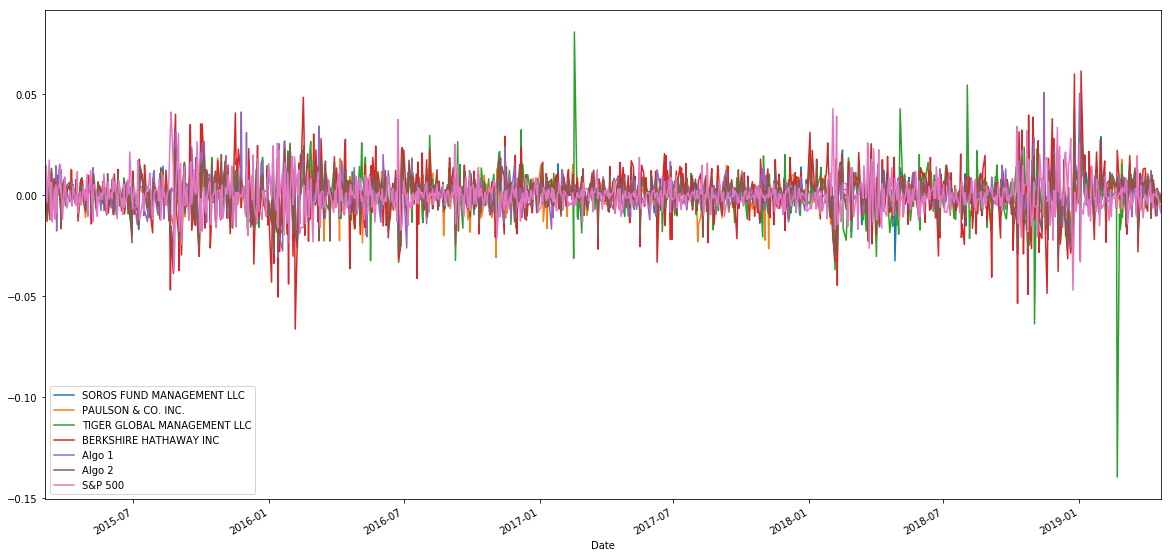

In [32]:
# Plot daily returns
# YOUR CODE HERE
chart_axes = concat_returns_df.plot(figsize=(20,10))

chart_axes.legend(['SOROS FUND MANAGEMENT LLC', 
            'PAULSON & CO. INC.', 
            'TIGER GLOBAL MANAGEMENT LLC', 
            'BERKSHIRE HATHAWAY INC',
            'Algo 1',
            'Algo 2',
            'S&P 500'])

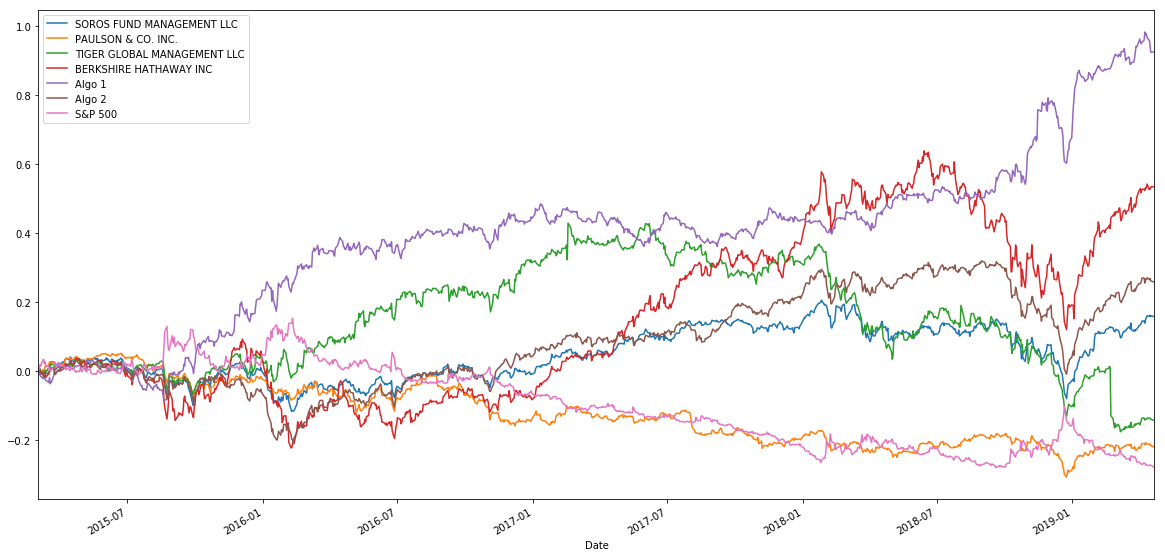

In [33]:
# Plot cumulative returns
# YOUR CODE HERE
concat_cumulative = (1 + concat_returns_df).cumprod() - 1

chart_axes = concat_cumulative.plot(figsize=(20,10))

chart_axes.legend(['SOROS FUND MANAGEMENT LLC', 
            'PAULSON & CO. INC.', 
            'TIGER GLOBAL MANAGEMENT LLC', 
            'BERKSHIRE HATHAWAY INC',
            'Algo 1',
            'Algo 2',
            'S&P 500'])

In [34]:
"""
Does any portfolio outperform the S&P 500?

From the daily returns plot and the cumulative returns plot, it appears that every portfolio outperformed the S&P 500.
"""

'\nCalculate and plot cumulative returns. Does any portfolio outperform the S&P 500?\n\nFrom the daily returns plot and the cumulative returns plot, it appears that every portfolio outperformed the S&P 500.\n'

---

## Performance by Month and Year

Analyze the performance by Month and Year:

1. Calculate the Annual Returns
2. Sort the 2017 portfolio returns in descending order to determine the best portfolios for 2017
3. Calculate the Monthly Returns
4. Sort in descending order, the porfolio returns for December 2018

In [17]:
# Returns by Year
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Year,,,,,,,
2015,-0.001755,-0.018798,0.028154,0.041279,0.235785,-0.064872,0.042665
2016,0.006357,-0.113786,0.285932,-0.074570,0.169710,0.130114,-0.106793
2017,0.139174,-0.083763,-0.004449,0.479395,-0.010532,0.151736,-0.157674
2018,-0.155639,-0.124487,-0.314504,-0.154322,0.164383,-0.155967,0.080887
2019,0.184567,0.076191,-0.052145,0.288971,0.093575,0.189086,-0.165591


In [18]:
# Top Portfolio returns for 2017
# YOUR CODE HERE

BERKSHIRE HATHAWAY INC         0.479395
Algo 2                         0.151736
SOROS FUND MANAGEMENT LLC      0.139174
TIGER GLOBAL MANAGEMENT LLC   -0.004449
Algo 1                        -0.010532
PAULSON & CO.INC.             -0.083763
S&P 500                       -0.157674
Name: 2017, dtype: float64

In [19]:
# Returns by Month
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Year Month                                                  
2015 3                       0.018496            0.016368   
     4                       0.002327            0.016717   
     5                       0.002031            0.017202   
     6                      -0.022387           -0.011315   
     7                      -0.013433           -0.020351   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Year Month                                                                  
2015 3                         0.009920                0.008938  0.014758   
     4                         0.012399                0.015854 -0.004224   
     5                        -0.007884               -0.008566  0.004221   
     6                        -0.023955               -0.023044  0.003256   
     7                         0.014274               -0.020391 -0.044059   

              Algo 2   S&P 500  
Year Month                      
2015 3     -0.000012  0.018857  
     4      0.006595 -0.019604  
     5     -0.002336  0.001307  
     6     -0.010888  0.015490  
     7     -0.019254 -0.010133

In [20]:
# Top Portfolio Returns for December 2018
# YOUR CODE HERE

S&P 500                        0.075708
Algo 1                        -0.059361
PAULSON & CO.INC.             -0.091802
SOROS FUND MANAGEMENT LLC     -0.097825
BERKSHIRE HATHAWAY INC        -0.110173
Algo 2                        -0.127480
TIGER GLOBAL MANAGEMENT LLC   -0.148269
Name: (2018, 12), dtype: float64

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

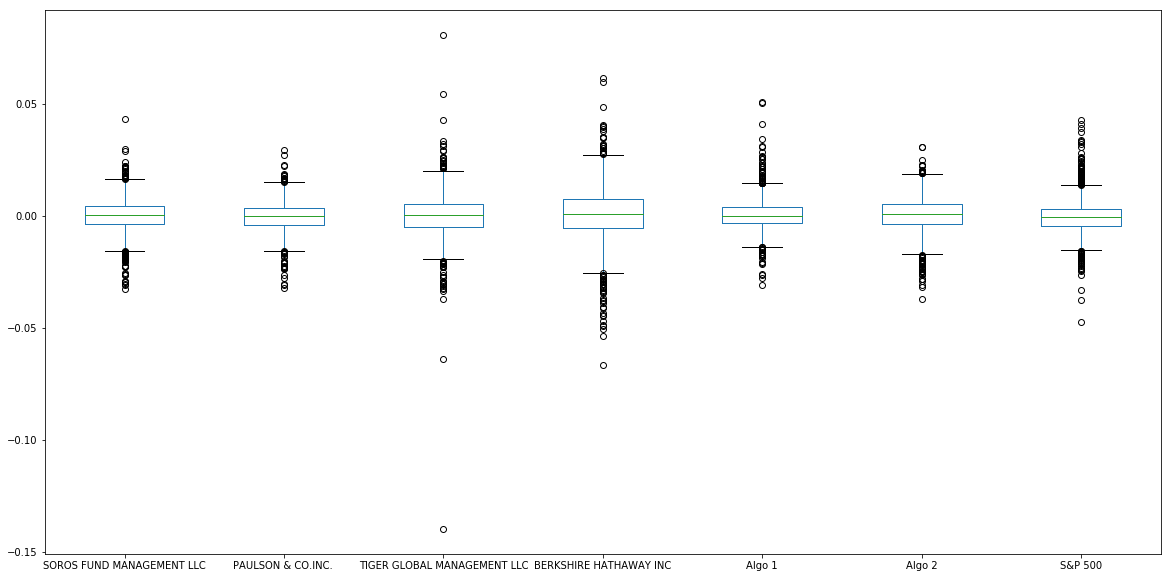

In [45]:
# Box plot to visually show risk
# YOUR CODE HERE
concat_returns_df.plot(kind='box',figsize=(20,10))

In [35]:
"""
Which box has the largest spread? Which has the smallest spread?

The box that has the largest spread is Tiger Global Management LLC.
The box that has the smallest spread is Paulson & Co. Inc.
"""

'\nCreate a box plot for each of the returns. Which box has the largest spread? Which has the smallest spread?\n\nThe box that has the largest spread is Tiger Global Management LLC.\nThe box that has the smallest spread is Paulson & Co. Inc.\n'

In [46]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
portfolio_std = concat_returns_df.std()
portfolio_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [47]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
for key,value in portfolio_std.items():
    if value > portfolio_std['S&P 500']:
        print(key,True)
    else:
        print(key,False)

SOROS FUND MANAGEMENT LLC False
PAULSON & CO.INC.  False
TIGER GLOBAL MANAGEMENT LLC True
BERKSHIRE HATHAWAY INC True
Algo 1 False
Algo 2 False
S&P 500 False


In [48]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
volatility = portfolio_std * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

In [ ]:
"""
Which portfolios are riskier than the S&P 500?


"""

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

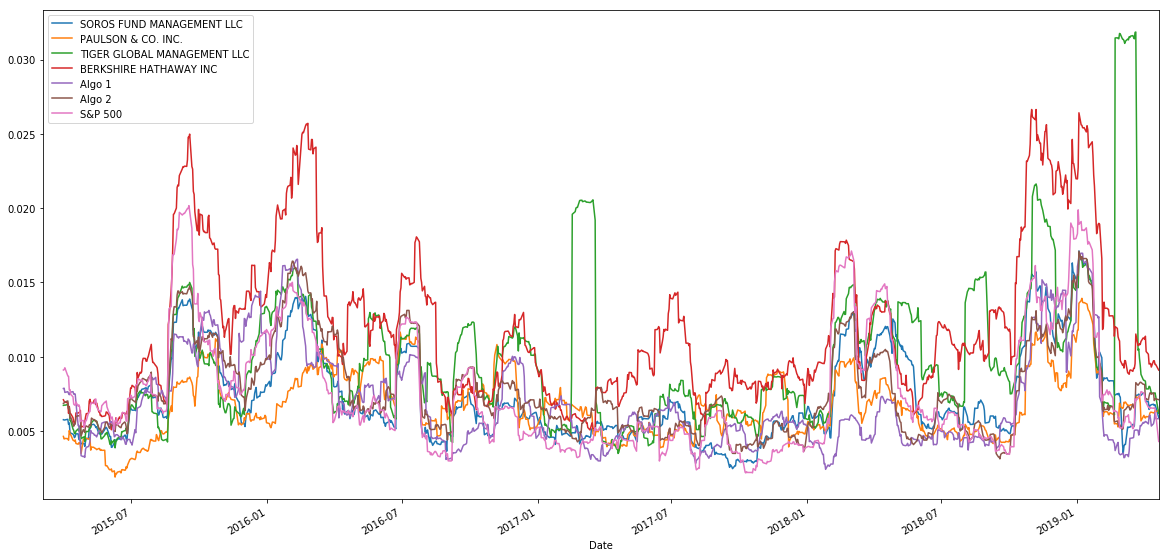

In [49]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE

concat_chart = concat_returns_df.rolling(window=21).std().plot(figsize=(20,10))

concat_chart.legend(['SOROS FUND MANAGEMENT LLC', 
            'PAULSON & CO. INC.', 
            'TIGER GLOBAL MANAGEMENT LLC', 
            'BERKSHIRE HATHAWAY INC',
            'Algo 1',
            'Algo 2',
            'S&P 500'])

In [50]:
# Correlation
# YOUR CODE HERE
concat_returns_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


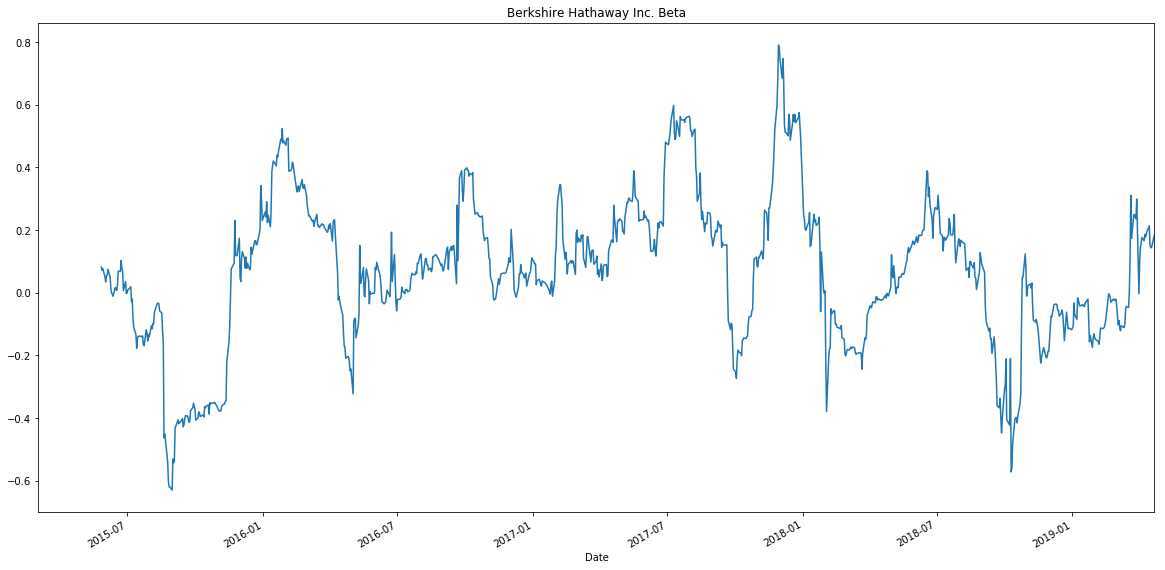

In [76]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

rolling_covariance = concat_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(concat_returns_df['S&P 500'])
rolling_variance = concat_returns_df['S&P 500'].rolling(window=60).var()
berkshire_rolling_beta = rolling_covariance / rolling_variance

berkshire_rolling_beta.plot(figsize=(20, 10), title='Berkshire Hathaway Inc. Beta')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

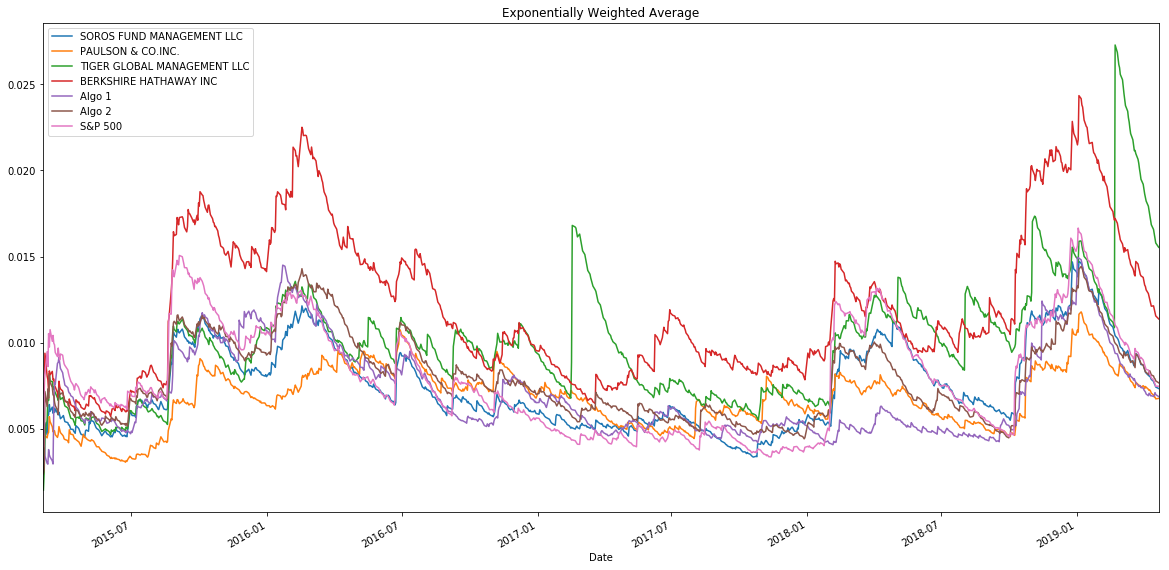

In [28]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [77]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (concat_returns_df.mean() * 252) / (concat_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

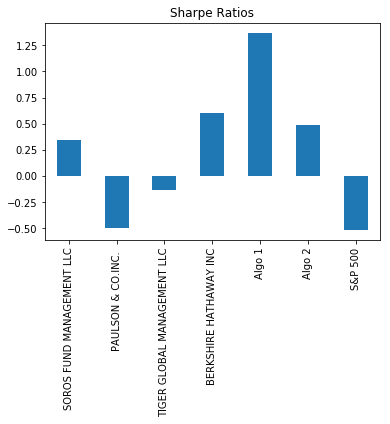

In [78]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind='bar',title='Sharpe Ratios')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [94]:
# Read the first stock
# YOUR CODE HERE
tsla_csv = Path('../Resources/tsla_historical.csv')
tsla_df = pd.read_csv(tsla_csv,index_col='date',parse_dates=True,infer_datetime_format=True)
tsla_df = tsla_df.drop(columns = ['volume','open','high','low'])
tsla_df.head()

,close
date,
2019-08-23 14:54:00,212.95
2019-08-22 00:00:00,222.15
2019-08-21 00:00:00,220.83
2019-08-20 00:00:00,225.86
2019-08-19 00:00:00,226.83


In [107]:
# Read the second stock
# YOUR CODE HERE
amzn_csv = Path('../Resources/amzn_historical.csv')
amzn_df = pd.read_csv(amzn_csv,index_col='date',parse_dates=True,infer_datetime_format=True)
amzn_df = amzn_df.drop(columns = ['volume','open','high','low'])
amzn_df.head()

,close
date,
2019-08-23 15:05:00,"1,752.21"
2019-08-22 00:00:00,1805.6000
2019-08-21 00:00:00,1823.5400
2019-08-20 00:00:00,1801.3800
2019-08-19 00:00:00,1816.1200


In [96]:
# Read the third stock
# YOUR CODE HERE
fb_csv = Path('../Resources/fb_historical.csv')
fb_df = pd.read_csv(fb_csv,index_col='date',parse_dates=True,infer_datetime_format=True)
fb_df = fb_df.drop(columns = ['volume','open','high','low'])
fb_df.head()

,close
date,
2019-08-23 15:06:00,177.80
2019-08-22 00:00:00,182.04
2019-08-21 00:00:00,183.55
2019-08-20 00:00:00,183.81
2019-08-19 00:00:00,186.17


In [113]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_portfolio_df = pd.concat([tsla_df,amzn_df,fb_df],axis='columns',join='inner')
my_portfolio_df.columns = ['TSLA','AMZN','FB']
my_portfolio_df['AMZN'] = my_portfolio_df['AMZN'].astype('float')
my_portfolio_df.head()

,TSLA,AMZN,FB
date,,,
2019-08-22,222.15,1805.60,182.04
2019-08-21,220.83,1823.54,183.55
2019-08-20,225.86,1801.38,183.81
2019-08-19,226.83,1816.12,186.17
2019-08-16,219.94,1792.57,183.70


In [35]:
# Reset the index
# YOUR CODE HERE

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40


In [115]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE
my_portfolio_df = pd.concat([tsla_df,amzn_df,fb_df],axis='columns',join='inner')
my_portfolio_df.columns = ['TSLA','AMZN','FB']
my_portfolio_df['AMZN'] = my_portfolio_df['AMZN'].astype('float')
my_portfolio_df.head()

,TSLA,AMZN,FB
date,,,
2019-08-22,222.15,1805.60,182.04
2019-08-21,220.83,1823.54,183.55
2019-08-20,225.86,1801.38,183.81
2019-08-19,226.83,1816.12,186.17
2019-08-16,219.94,1792.57,183.70


In [116]:
# Drop Nulls
# YOUR CODE HERE
my_portfolio_df = my_portfolio_df.dropna()
my_portfolio_df.head()

,TSLA,AMZN,FB
date,,,
2019-08-22,222.15,1805.60,182.04
2019-08-21,220.83,1823.54,183.55
2019-08-20,225.86,1801.38,183.81
2019-08-19,226.83,1816.12,186.17
2019-08-16,219.94,1792.57,183.70


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [122]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

my_daily_returns = my_portfolio_df.pct_change()
my_portfolio_returns = my_daily_returns.dot(weights)
my_portfolio_returns = my_portfolio_returns.dropna()
my_portfolio_returns.head()

date
2019-08-21    0.004096
2019-08-20    0.004014
2019-08-19    0.008439
2019-08-16   -0.018870
2019-08-15   -0.011590
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [132]:
# YOUR CODE HERE
all_concat_returns_df = pd.concat([concat_returns_df,my_portfolio_returns],axis='columns',join='inner')

all_concat_returns_df = all_concat_returns_df.rename(columns={
    0 : 'Custom',
})

all_concat_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-02-22,-0.004249,-0.002516,0.001626,-0.000676,0.002146,-0.000010,-0.015775,-0.016645
2018-02-23,0.013610,0.005862,0.018408,0.016526,0.000155,0.010247,-0.011620,-0.012772
2018-02-26,0.003984,0.006145,0.009546,-0.001412,-0.001839,0.005430,0.012870,0.014679
2018-02-27,-0.018335,-0.007856,-0.021110,-0.012554,-0.002081,-0.011960,0.011220,0.013471
2018-02-28,-0.010668,-0.011224,-0.011477,-0.002810,0.011080,-0.012156,0.013504,0.020968


In [40]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [134]:
# Risk
# YOUR CODE HERE
all_concat_returns_std = all_concat_returns_df.std()
all_volatility = all_concat_returns_std * np.sqrt(252)
all_volatility

SOROS FUND MANAGEMENT LLC      0.150945
PAULSON & CO.INC.              0.116143
TIGER GLOBAL MANAGEMENT LLC    0.227071
BERKSHIRE HATHAWAY INC         0.233854
Algo 1                         0.126133
Algo 2                         0.137071
S&P 500                        0.156902
Custom                         0.331959
dtype: float64

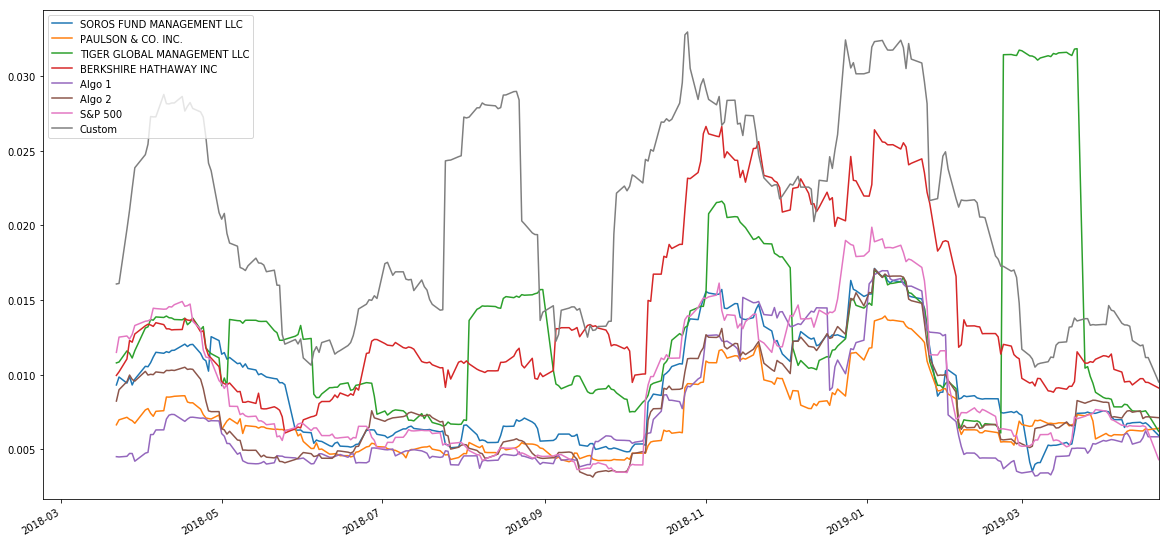

In [135]:
# Rolling
# YOUR CODE HERE
concat_chart = all_concat_returns_df.rolling(window=21).std().plot(figsize=(20,10))

concat_chart.legend(['SOROS FUND MANAGEMENT LLC', 
            'PAULSON & CO. INC.', 
            'TIGER GLOBAL MANAGEMENT LLC', 
            'BERKSHIRE HATHAWAY INC',
            'Algo 1',
            'Algo 2',
            'S&P 500',
            'Custom'])

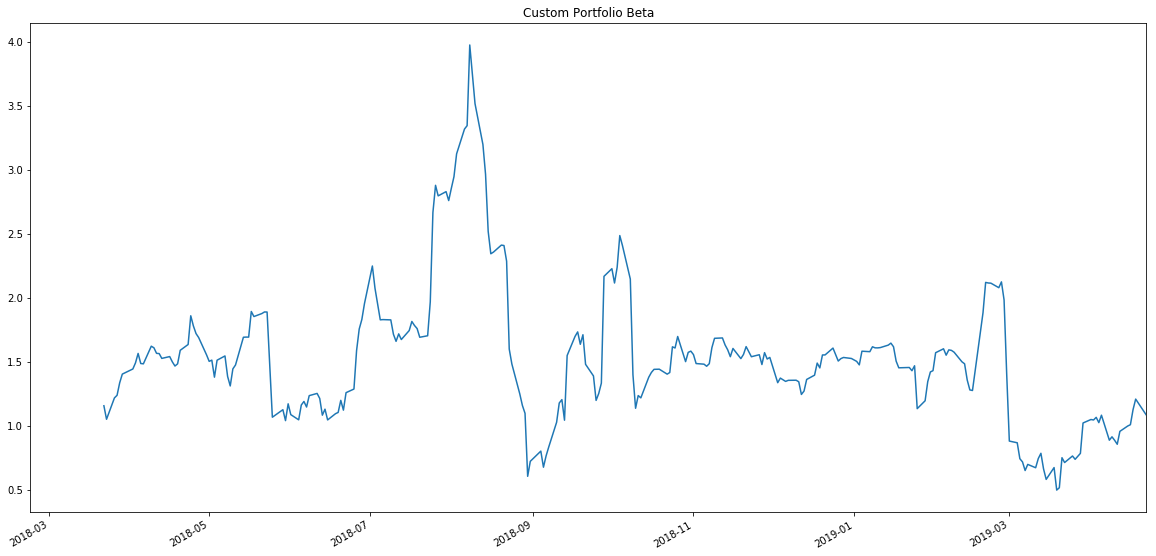

In [136]:
# Beta
# YOUR CODE HERE

rolling_covariance = all_concat_returns_df['Custom'].rolling(window=21).cov(all_concat_returns_df['S&P 500'])
rolling_variance = all_concat_returns_df['S&P 500'].rolling(window=21).var()
custom_rolling_beta = rolling_covariance / rolling_variance

custom_rolling_beta.plot(figsize=(20, 10), title='Custom Portfolio Beta')

In [137]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
all_sharpe_ratios = (all_concat_returns_df.mean() * 252) / (all_concat_returns_df.std() * np.sqrt(252))
all_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.029045
PAULSON & CO.INC.              0.005724
TIGER GLOBAL MANAGEMENT LLC   -1.183733
BERKSHIRE HATHAWAY INC         0.227259
Algo 1                         2.049561
Algo 2                         0.125291
S&P 500                       -0.370341
Custom                         0.289697
dtype: float64

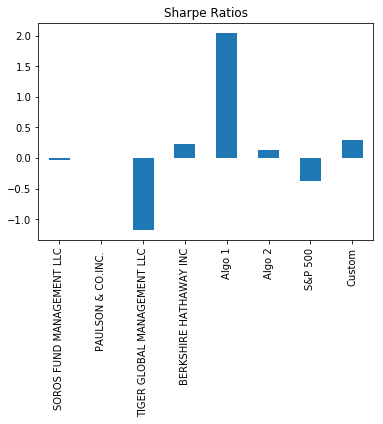

In [138]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
all_sharpe_ratios.plot(kind='bar',title='Sharpe Ratios')

## Include correlation analysis to determine which stocks (if any) are correlated

In [139]:
# YOUR CODE HERE
all_concat_returns_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.772623,0.510125,0.793065,0.324717,0.843438,-0.007131,0.032607
PAULSON & CO.INC.,0.772623,1.000000,0.522752,0.647158,0.338112,0.789479,-0.016524,0.028678
TIGER GLOBAL MANAGEMENT LLC,0.510125,0.522752,1.000000,0.366017,0.131521,0.463534,-0.014908,0.019745
BERKSHIRE HATHAWAY INC,0.793065,0.647158,0.366017,1.000000,0.319295,0.787472,-0.023727,-0.013164
Algo 1,0.324717,0.338112,0.131521,0.319295,1.000000,0.346157,-0.039620,-0.054196
Algo 2,0.843438,0.789479,0.463534,0.787472,0.346157,1.000000,-0.017062,0.026897
S&P 500,-0.007131,-0.016524,-0.014908,-0.023727,-0.039620,-0.017062,1.000000,0.689778
Custom,0.032607,0.028678,0.019745,-0.013164,-0.054196,0.026897,0.689778,1.000000
